In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

archivo= "Causas_desgregadas_conaset_carabineros2000-2023.xlsx"
df = pd.read_excel(archivo, sheet_name="2023")
df = df.drop(df.index[10:])
df= df.drop(0).reset_index(drop=True)
df.rename(columns={'Unnamed: 1': 'Causa Basal','Siniestros de tránsito y consecuencias según Causa, año 2023':'Causa','Unnamed: 2':'Siniestros', 'Unnamed: 3':'Fallecidos','Unnamed: 4':'Graves','Unnamed: 5':'Menos graves', 'Unnamed: 6':'Leves','Unnamed: 7':'Total lesionados'}, inplace=True)

df

,Causa,Causa Basal,Siniestros,Fallecidos,Graves,Menos graves,Leves,Total lesionados
0,Causa (*),Causa Basal (**),Siniestros,Fallecidos,Lesionados,NaN,NaN,Total lesionados
1,NaN,NaN,NaN,NaN,Graves,Menos graves,Leves,NaN
2,Alcohol en conductor,Conducción bajo la influencia del alcohol,929,31,173,96,658,927
3,NaN,Conducción en estado de ebriedad,7144,132,843,496,4360,5699
4,Total Alcohol en conductor,NaN,8073,163,1016,592,5018,6626
5,Alcohol en pasajero,Ebriedad del pasajero,6,0,0,0,4,4
6,Total Alcohol en pasajero,NaN,6,0,0,0,4,4
7,Alcohol en peatón,Ebriedad del peatón,125,9,54,16,52,122
8,Total Alcohol en peatón,NaN,125,9,54,16,52,122


In [2]:

archivo = "Causas_desgregadas_conaset_carabineros2000-2023.xlsx"
dataframes1 = []


for year in range(2000, 2024):
    sheet_name = str(year)
    df1 = pd.read_excel(archivo, sheet_name=sheet_name)
    df1 = df1.drop(0).reset_index(drop=True)
    df1.rename(columns={
        'Unnamed: 1': 'Causa Basal',
        f'Siniestros de tránsito y consecuencias según Causa, año {year}': 'Causa',
        'Unnamed: 2': 'Siniestros',
        'Unnamed: 3': 'Fallecidos',
        'Unnamed: 4': 'Graves',
        'Unnamed: 5': 'Menos graves',
        'Unnamed: 6': 'Leves',
        'Unnamed: 7': 'Total lesionados'
    }, inplace=True)
    df1 = pd.DataFrame(df1.loc[(df1['Causa']=='Total General') | (df1['Causa']=='Total general')| (df1['Causa']=="Total general")].reset_index(drop=True))
    df1 = df1.drop('Causa Basal', axis=1)
    df1['Año'] = year
    dataframes1.append(df1)

df_final1 = pd.concat(dataframes1, ignore_index=True)

df_final1

,Causa,Siniestros,Fallecidos,Graves,Menos graves,Leves,Total lesionados,Año
0,Total General,40926,1698,8090,6929,31639,46658,2000
1,Total General,44831,1562,7329,6567,31448,45344,2001
2,Total General,41734,1549,7317,6284,30521,44122,2002
3,Total General,44450,1703,7497,5772,32066,45335,2003
4,Total General,46620,1757,7166,5332,34012,46510,2004
5,Total General,46328,1626,6844,4878,36070,47792,2005
6,Total General,44839,1652,6515,4490,36020,47025,2006
7,Total General,53682,1645,7374,4977,41659,54010,2007
8,Total General,57087,1782,7488,5119,42679,55286,2008
9,Total General,56330,1508,6748,4377,41050,52175,2009


In [3]:
df_total = df_final1[['Año', 'Total lesionados']]
df_total

,Año,Total lesionados
0,2000,46658
1,2001,45344
2,2002,44122
3,2003,45335
4,2004,46510
5,2005,47792
6,2006,47025
7,2007,54010
8,2008,55286
9,2009,52175


In [4]:

archivo = "Causas_desgregadas_conaset_carabineros2000-2023.xlsx"
dataframes = []

for year in range(2000, 2024):
    sheet_name = str(year)
    df = pd.read_excel(archivo, sheet_name=sheet_name)
    df = df.drop(df.index[10:])
    df = df.drop(0).reset_index(drop=True)
    df.rename(columns={
        'Unnamed: 1': 'Causa Basal',
        f'Siniestros de tránsito y consecuencias según Causa, año {year}': 'Causa',
        'Unnamed: 2': 'Siniestros',
        'Unnamed: 3': 'Fallecidos',
        'Unnamed: 4': 'Graves',
        'Unnamed: 5': 'Menos graves',
        'Unnamed: 6': 'Leves',
        'Unnamed: 7': 'Total lesionados'
    }, inplace=True)
    df = df.drop(index=[0,1,2,3,5,6,7,8,]).reset_index(drop=True)
    df = df.drop('Causa Basal', axis=1)
    df['Año'] = year
    dataframes.append(df)

df_final = pd.concat(dataframes, ignore_index=True)

df_final

,Causa,Siniestros,Fallecidos,Graves,Menos graves,Leves,Total lesionados,Año
0,Total Alcohol en Conductor,2704,167,823,575,2592,3990,2000
1,Total Alcohol en Conductor,2652,114,728,531,2304,3563,2001
2,Total Alcohol en Conductor,2526,157,697,591,2245,3533,2002
3,Total Alcohol en Conductor,3009,201,814,628,2552,3994,2003
4,Total Alcohol en Conductor,2947,183,792,581,2586,3959,2004
5,Total Alcohol en Conductor,2927,209,703,509,2850,4062,2005
6,Total Alcohol en Conductor,3082,224,802,524,2968,4294,2006
7,Total Alcohol en Conductor,3945,218,820,589,3768,5177,2007
8,Total Alcohol en Conductor,4205,244,914,660,3895,5469,2008
9,Total Alcohol en Conductor,4051,216,867,542,3666,5075,2009


In [5]:
df_visual1 = df_final[['Año', 'Total lesionados']]
df_visual1.rename(columns={'Total lesionados': 'Lesiones por ebriedad'}, inplace=True)
df_visual1
df_ff = pd.merge(df_total, df_visual1, on='Año')
df_ff['Lesiones por Ebriedad %'] = ((df_ff['Lesiones por ebriedad']/ df_ff['Total lesionados'])*100)
df_ff['Lesiones por Ebriedad %'] = pd.to_numeric(df_ff['Lesiones por Ebriedad %'], errors='coerce')
df_ff['Lesiones por Ebriedad %'] = (df_ff['Lesiones por Ebriedad %'].round(2))
df_ff

C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_9348\890246324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visual1.rename(columns={'Total lesionados': 'Lesiones por ebriedad'}, inplace=True)


,Año,Total lesionados,Lesiones por ebriedad,Lesiones por Ebriedad %
0,2000,46658,3990,8.55
1,2001,45344,3563,7.86
2,2002,44122,3533,8.01
3,2003,45335,3994,8.81
4,2004,46510,3959,8.51
5,2005,47792,4062,8.50
6,2006,47025,4294,9.13
7,2007,54010,5177,9.59
8,2008,55286,5469,9.89
9,2009,52175,5075,9.73


C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_9348\3007369989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visual['Lesiones por Ebriedad %'] = pd.to_numeric(df_visual['Lesiones por Ebriedad %'], errors='coerce')
C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_9348\3007369989.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


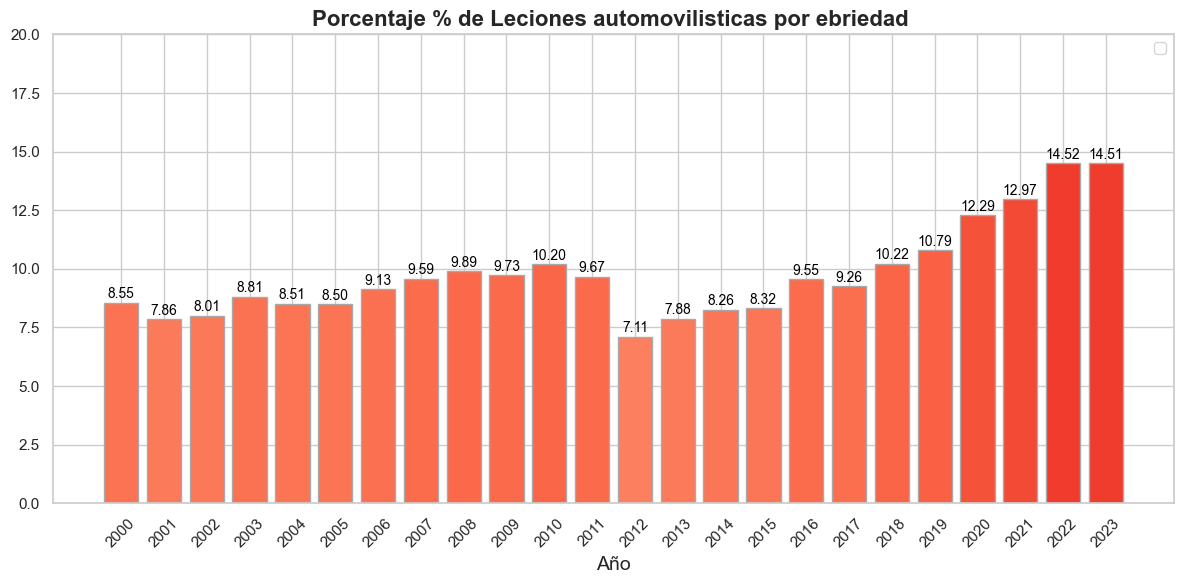

In [6]:
df_visual = df_ff[['Año', 'Lesiones por Ebriedad %']]


df_visual['Lesiones por Ebriedad %'] = pd.to_numeric(df_visual['Lesiones por Ebriedad %'], errors='coerce')

mean_value = df_visual['Lesiones por Ebriedad %'].mean()
norm = plt.Normalize(mean_value * -1, mean_value *3 )
colors = plt.cm.Reds(norm(df_visual['Lesiones por Ebriedad %'].values))

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

barplot = plt.bar(df_visual['Año'], df_visual['Lesiones por Ebriedad %'], color=colors, edgecolor='darkgray')
plt.title(f"Porcentaje % de Leciones automovilisticas por ebriedad ", fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('', fontsize=14)
plt.gca().set_facecolor('white')

plt.ylim(0, 20)
plt.xticks(df_visual['Año'],rotation=45)

for p in barplot:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
             ha='center', va='bottom', fontsize=10, color='black', xytext=(0,1), 
             textcoords='offset points')

plt.legend()
plt.tight_layout()
plt.savefig('lesionados_por_conductores.png', format='png', dpi=300)
plt.show()

In [7]:
media=5082.92
mean_value

np.float64(9.755416666666667)

C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_9348\840239444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visual['Lesiones por Ebriedad %'] = pd.to_numeric(df_visual['Lesiones por Ebriedad %'], errors='coerce')
C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_9348\840239444.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


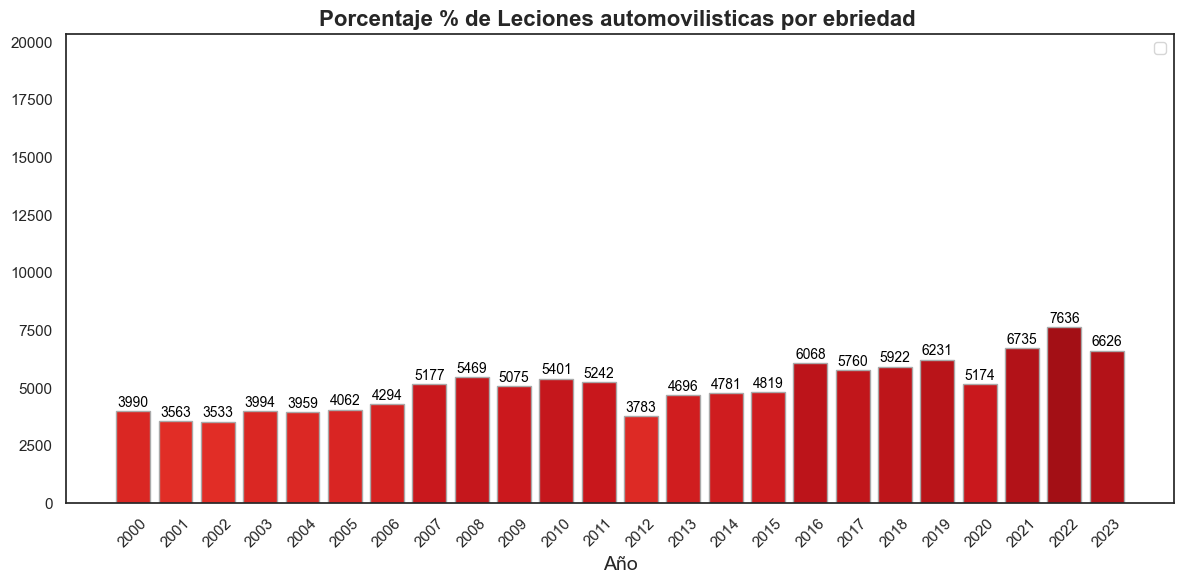

In [8]:

df_final.rename(columns={'Total lesionados':'Lesiones por Ebriedad %'},inplace=True)
df_visual = df_final[['Año', 'Lesiones por Ebriedad %']]

df_visual['Lesiones por Ebriedad %'] = pd.to_numeric(df_visual['Lesiones por Ebriedad %'], errors='coerce')

mean_value = df_visual['Lesiones por Ebriedad %'].mean()
norm = plt.Normalize(mean_value * -2, mean_value *2 )
colors = plt.cm.Reds(norm(df_visual['Lesiones por Ebriedad %'].values))

sns.set(style="white")

plt.figure(figsize=(12, 6))

barplot = plt.bar(df_visual['Año'], df_visual['Lesiones por Ebriedad %'], color=colors, edgecolor='darkgray')
plt.title(f"Porcentaje % de Leciones automovilisticas por ebriedad ", fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('', fontsize=14)
plt.gca().set_facecolor('white')

plt.ylim(0, mean_value * 4)
plt.xticks(df_visual['Año'],rotation=45)

for p in barplot:
    plt.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
             ha='center', va='bottom', fontsize=10, color='black', xytext=(0,1), 
             textcoords='offset points')

plt.legend()
plt.tight_layout()

plt.show()